Работа по курсовому проекту.

Задание:
Используя данные из обучающего датасета (train.csv), построить модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели, предсказать цены для квартир из тестового датасета (test.csv).

Целевая переменная:
Price

Метрика качества:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Требования к решению:
1. R2 > 0.6
2. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}_solution.ipynb, пример SShirkin_solution.ipynb
3. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}_predictions.csv, пример SShirkin_predictions.csv 
Файл должен содержать два поля: Id, Price и в файле должна быть 5001 строка (шапка + 5000 предсказаний).

Сроки сдачи:
Cдать проект нужно в течение 72 часов после окончания последнего вебинара. Оценки работ, сданных до дедлайна, будут представлены в виде рейтинга, ранжированного по заданной метрике качества. Проекты, сданные после дедлайна или сданные повторно, не попадают в рейтинг, но можно будет узнать результат.

Рекомендации для файла с кодом (ipynb):
1. Файл должен содержать заголовки и комментарии (markdown)
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. Допускается применение библиотек Python и моделей машинного обучения,
которые были в данном курсе.

Описание датасета:
1. Id - идентификационный номер квартиры
2. DistrictId - идентификационный номер района
3. Rooms - количество комнат
4. Square - площадь
5. LifeSquare - жилая площадь
6. KitchenSquare - площадь кухни
7. Floor - этаж
8. HouseFloor - количество этажей в доме
9. HouseYear - год постройки дома
10. Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
11. Social_1, Social_2, Social_3 - социальные показатели местности
12. Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
13. Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
14. Price - цена квартиры

Загружаем тренировочный набор.

In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [895]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [14]:
len(df) - df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

Итак у нас 10000 домов, пропуски в показателях жилой площади и в Healthcare_1..

In [7]:
df.select_dtypes(include=['int64', 'float64']).head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644


In [8]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Не-числовые признаки у нас Ecology_2, Ecology_3, Shops_2:

In [9]:
df.select_dtypes(include=['object']).head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B


In [899]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [898]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [897]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

Пропуски. (они у нас в числовых значениях Healthcare_1 и жилой площади) Healthcare_1 некая абстрактная переменная - представить ее смысл исходя из описания невозможно, поэтому думаю пропуски в ней можно пока попробовать заполнить просто средним значением... (какого-то наиболее частого значения в этом признаке не прослеживается)

In [896]:
df['Healthcare_1'].mode()

0    540.0
dtype: float64

0 повторяется чаще всего - но в общем объеме данных составляет < 0.1, соответственно пока берем median (это явно будет лучше, особенно если там еще есть выбросы..

In [701]:
df.loc[df2['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()

In [352]:
df['Healthcare_1'].describe()

count    10000.000000
mean      1026.358900
std        746.662828
min          0.000000
25%        830.000000
50%        900.000000
75%        990.000000
max       4849.000000
Name: Healthcare_1, dtype: float64

По LifeSquare немного сложнее, думаю нужно вывести среднее соотношение общей площади к жилой - и выставлять значение исходя из этого соотношения.
Но - наверняка у нас в колонке общих площадей хотя и нет пропусков - есть выбросы как в сторону нуля (по статистке есть значния около 0 - что скорее всего неверно, так есть и очень большие > 600м2..)

In [353]:
df['Square'].describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

Попробуем понять насколько их там много..

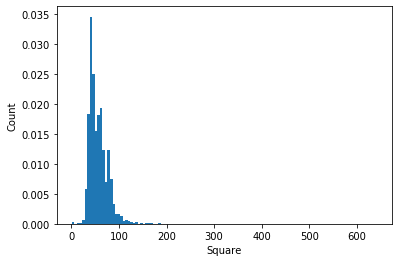

In [354]:
plt.figure(figsize=(18,7))
plt.hist(df['Square'], bins=120, density=True)
plt.xlabel('Square')
plt.ylabel('Count')
plt.draw()

И тех и других отклонений мало.

In [355]:
df[df['Square'] < 10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,900.0,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,900.0,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,900.0,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,900.0,0,0,B,126596.941798
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,900.0,0,1,B,161379.067034
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B,181434.825589
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B,237716.681261
8283,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,900.0,1,11,B,458378.777006


Домов с площадью меньше 10м2 всего-то 12 штук.. И там полный бред в соотношении площадей Жилой и общей. Попробуем выявить все у кого жилая площадь больше общей..

In [356]:
df[df['Square'] < df['LifeSquare']].shape

(482, 20)

Таких довольно много уже. Посмотрим сколько супер-больших

In [357]:
df[df['Square'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,900.0,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,900.0,1,4,B,528560.506016


Ну 200м2 квартира еще представима - но 400 и даже 600.. хотя - если обратиться к интернет - то в Москве например встречаются - цена только не выглядит реалистичной (в сравнении с 200 метровыми). Что-же с ними делать. Избавимся от них так как их очень мало

In [358]:
df.drop(df[df['Square']>400].index, inplace=True)

Теперь микроскопические. Попробуем выяснить основное соотношение общей площади к жилой..

In [359]:
square_ratio = df['Square'].median()/df['LifeSquare'].median()
square_ratio

1.6021326087961296

Ок.. Попробуем восстановить с помощью этого супер-маленькие общие площади..

In [360]:
df.loc[(df['Square'] < 10) & (df['LifeSquare'] > 10), 'Square'] = df['LifeSquare'] * square_ratio

In [361]:
df.loc[212]

Id                   1748
DistrictId             88
Rooms                   2
Square             108.35
LifeSquare        67.6287
KitchenSquare           1
Floor                  24
HouseFloor             22
HouseYear            1977
Ecology_1        0.127376
Ecology_2               B
Ecology_3               B
Social_1               43
Social_2             8429
Social_3                3
Healthcare_1          900
Helthcare_2             3
Shops_1                 9
Shops_2                 B
Price              412511
Name: 212, dtype: object

Остальные отсутствующие или супер-маленькие общие площади...

In [362]:
df.loc[(df['Square'] < 6)].shape

(9, 20)

Всего 9 записей. Удаляем

In [363]:
df.drop(df[df['Square']<6].index, inplace=True)

Ну и теперь попробуем выправить отсутствующие жилые площади обратно.

In [364]:
df.loc[(df['LifeSquare'] < 5), 'LifeSquare'] = df['Square'] / square_ratio

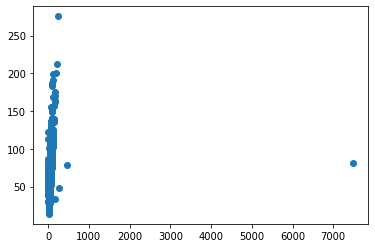

In [365]:
plt.scatter(df['LifeSquare'], df['Square'])
plt.draw()

In [366]:
df['LifeSquare'].max()

7480.592128925201

Еще выброс по жилой площади. 

In [368]:
df.loc[df['LifeSquare'] > 1000]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,900.0,0,0,B,217357.492366


У него нормальная общая площадь. Лечим..

In [369]:
df.loc[df['LifeSquare'] > df['Square'], 'LifeSquare'] = df['Square'] / square_ratio

In [370]:
df.loc[4328]

Id                   16550
DistrictId              27
Rooms                    3
Square             81.6944
LifeSquare          50.991
KitchenSquare            1
Floor                    9
HouseFloor              17
HouseYear             2016
Ecology_1        0.0176471
Ecology_2                B
Ecology_3                B
Social_1                 2
Social_2               469
Social_3                 0
Healthcare_1           900
Helthcare_2              0
Shops_1                  0
Shops_2                  B
Price               217357
Name: 4328, dtype: object

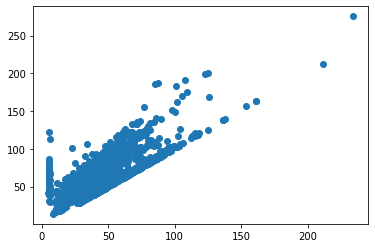

In [371]:
plt.scatter(df['LifeSquare'], df['Square'])
plt.draw()

Все-таки часть значений для жилой площади все еще не соответствует общим площадям квартир.

In [372]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9988.000000,9988.000000,9988.00000,9988.000000,7876.000000,9988.000000,9988.000000,9988.000000,9.988000e+03,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,8383.683220,50.426211,1.89127,56.243459,35.341413,6.277934,8.524229,12.615138,3.992569e+03,0.118863,24.696536,5353.968062,8.032439,1026.502303,1.319483,4.230376,214108.240296
std,4859.141539,43.598423,0.83935,19.095167,15.472153,28.577514,5.234227,6.770839,2.006207e+05,0.119054,17.534235,4006.975770,23.808096,746.823145,1.493604,4.804133,92789.208200
min,0.000000,0.000000,0.00000,13.784865,5.005477,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.500000,20.000000,1.00000,41.787090,23.189854,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153907.528147
50%,8394.500000,36.000000,2.00000,52.539909,32.416157,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192304.063740
75%,12594.250000,75.000000,2.00000,65.912854,44.066923,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249116.513046
max,16798.000000,209.000000,19.00000,275.645284,233.949309,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Попробуем всетаки как то их исправить.. Возможно критерий будет такой - если жилая площадь очень маленькая (меньше первого квартиле) и разрыв между ней и общей площадью достаточно велик - то исправляем ее согласно общей площади.

In [373]:
df.loc[(df['Square'] / df['LifeSquare'] > square_ratio * 2) & (df['LifeSquare'] < 20)\
       , 'LifeSquare'] = df['Square'] / square_ratio

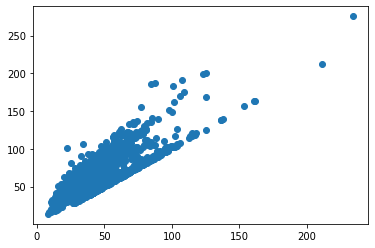

In [374]:
plt.scatter(df['LifeSquare'], df['Square'])
plt.draw()

Не знаю - поможет ли нам это - но выглядит более-менее разумно

Наконец вылечим пропуски в жил-площадях

In [375]:
df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['Square'] / square_ratio

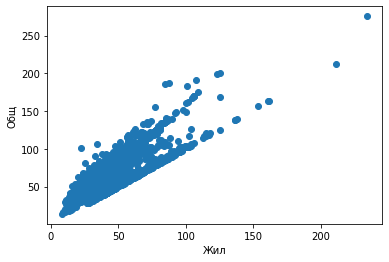

In [376]:
plt.scatter(df['LifeSquare'], df['Square'])
plt.xlabel('Жил')
plt.ylabel('Общ')
plt.draw()

В площади кухни тоже явно есть выбросы посмотрим..

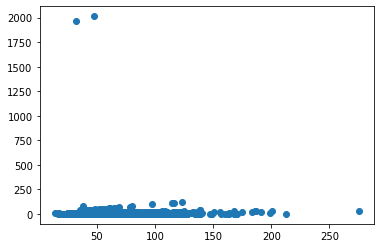

In [377]:
plt.scatter(df['Square'], df['KitchenSquare'])
plt.draw()

Есть нулевые кухни (не знаю, наверное такое может быть впринципе - студия?) Но супер-огромные надо вылечить.

In [378]:
df.loc[df['KitchenSquare'] > 200, 'KitchenSquare'] = \
df['Square'] / (df['Square'].median()/df['KitchenSquare'].median())

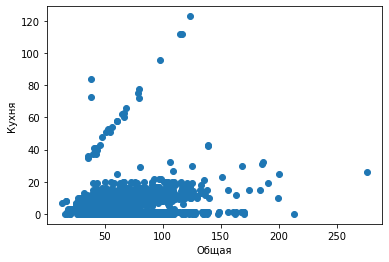

In [379]:
plt.scatter(df['Square'], df['KitchenSquare'])
plt.xlabel('Общая')
plt.ylabel('Кухня')
plt.draw()

Ох.. кажется все не так хорошо до сих пор. Площади кухни больше чем или равные общей площади - это тоже неправильно.. Это больше смахивает на соотношение жилой к общей.. может это ошибка заполнения? Явно вылетевшие поправим по тому-же принципу..

In [380]:
df.loc[df['KitchenSquare'] > df['Square'], 'KitchenSquare'] =\
df['Square'] / (df['Square'].median()/df['KitchenSquare'].median())

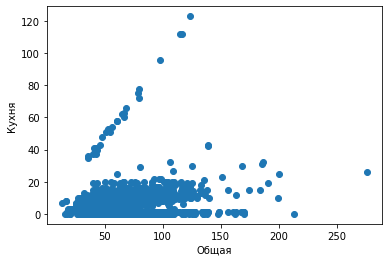

In [381]:
plt.scatter(df['Square'], df['KitchenSquare'])
plt.xlabel('Общая')
plt.ylabel('Кухня')
plt.draw()

А вот с этой диагональю попробуем подумать, что это жилую записали в кухню.. И перенесем ее в жилую площадь, а кухню приведем к среднему соотношению

In [382]:
kitchen_ratio = df['Square'].median()/df['KitchenSquare'].median()
kitchen_ratio

8.756651563192996

In [383]:
df.loc[(abs((df['Square'] / df['KitchenSquare']) - square_ratio) < 0.2), 'LifeSquare'] = df['KitchenSquare']

In [384]:
df.loc[df['KitchenSquare'] == df['LifeSquare'], 'KitchenSquare'] = df['Square'] / kitchen_ratio

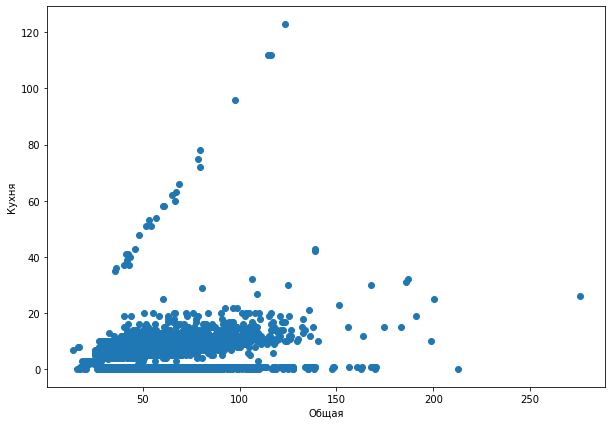

In [385]:
plt.figure(figsize=(10,7))
plt.scatter(df['Square'], df['KitchenSquare'])
plt.xlabel('Общая')
plt.ylabel('Кухня')
plt.draw()

Не поймались.. Значит просто приводим к среднему соотношению их..

In [386]:
df.loc[abs((df['KitchenSquare']/df['Square']) > 0.7), 'KitchenSquare'] = df['Square'] / kitchen_ratio

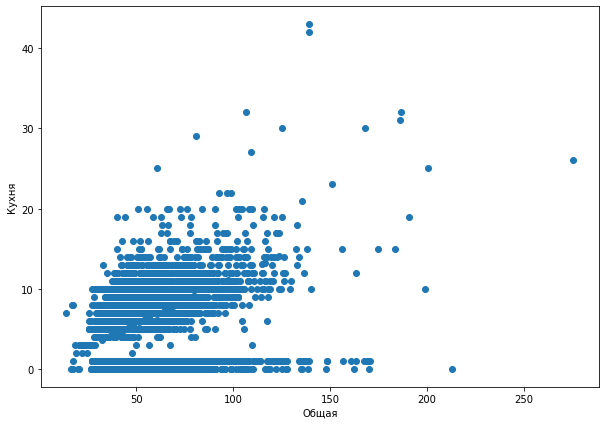

In [387]:
plt.figure(figsize=(10,7))
plt.scatter(df['Square'], df['KitchenSquare'])
plt.xlabel('Общая')
plt.ylabel('Кухня')
plt.draw()

Ну наверное так более менее..

In [388]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9988.000000,9988.000000,9988.00000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9.988000e+03,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,8383.683220,50.426211,1.89127,56.243459,35.937893,5.720407,8.524229,12.615138,3.992569e+03,0.118863,24.696536,5353.968062,8.032439,1026.502303,1.319483,4.230376,214108.240296
std,4859.141539,43.598423,0.83935,19.095167,14.752744,3.996641,5.234227,6.770839,2.006207e+05,0.119054,17.534235,4006.975770,23.808096,746.823145,1.493604,4.804133,92789.208200
min,0.000000,0.000000,0.00000,13.784865,8.604072,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.500000,20.000000,1.00000,41.787090,24.763243,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153907.528147
50%,8394.500000,36.000000,2.00000,52.539909,33.075870,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192304.063740
75%,12594.250000,75.000000,2.00000,65.912854,44.035075,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249116.513046
max,16798.000000,209.000000,19.00000,275.645284,233.949309,43.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9988 entries, 0 to 9999
Data columns (total 20 columns):
Id               9988 non-null int64
DistrictId       9988 non-null int64
Rooms            9988 non-null float64
Square           9988 non-null float64
LifeSquare       9988 non-null float64
KitchenSquare    9988 non-null float64
Floor            9988 non-null int64
HouseFloor       9988 non-null float64
HouseYear        9988 non-null int64
Ecology_1        9988 non-null float64
Ecology_2        9988 non-null object
Ecology_3        9988 non-null object
Social_1         9988 non-null int64
Social_2         9988 non-null int64
Social_3         9988 non-null int64
Healthcare_1     9988 non-null float64
Helthcare_2      9988 non-null int64
Shops_1          9988 non-null int64
Shops_2          9988 non-null object
Price            9988 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.9+ MB


Выбросы в количестве комнат... 

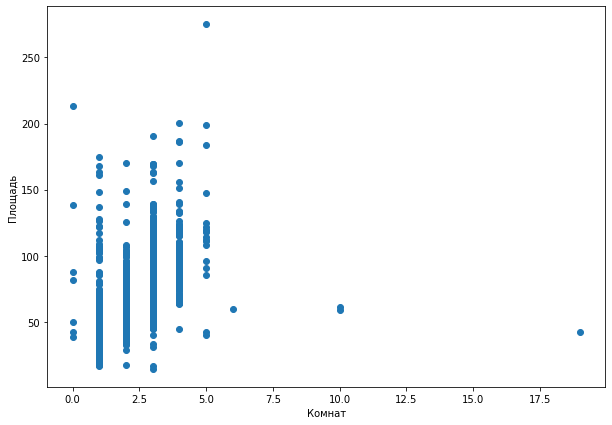

In [390]:
plt.figure(figsize=(10,7))
plt.scatter(df['Rooms'], df['Square'])
plt.xlabel('Комнат')
plt.ylabel('Площадь')
plt.draw()

In [391]:
df.loc[df['Rooms']==0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,900.0,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,900.0,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,26.084533,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,98129.976788
3911,770,28,0.0,49.483501,30.886021,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,50.864358,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,900.0,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,219281.918007


0 комнат - это конечно бред для квартиры.. Думаю количество комнат в некотором роде все-таки зависит от площади..

In [392]:
rooms_ratio = df['Square'].median()/df['Rooms'].median()
rooms_ratio

26.269954689578988

Сначала нулевые..

In [393]:
df.loc[df['Rooms'] == 0, 'Rooms'] = df['Square'] / rooms_ratio

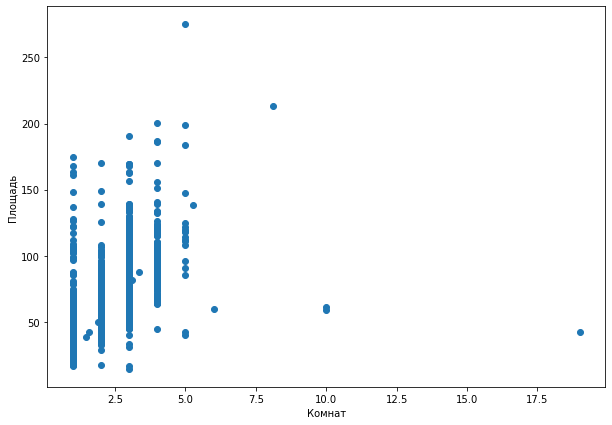

In [394]:
plt.figure(figsize=(10,7))
plt.scatter(df['Rooms'], df['Square'])
plt.xlabel('Комнат')
plt.ylabel('Площадь')
plt.draw()

19 комнат в квартире площадью 50м2 тоже думаю неправда - даже 10 много попробуем вылечить.

In [395]:
df.loc[df['Square']/df['Rooms'] < 7, 'Rooms'] = df['Square'] / rooms_ratio

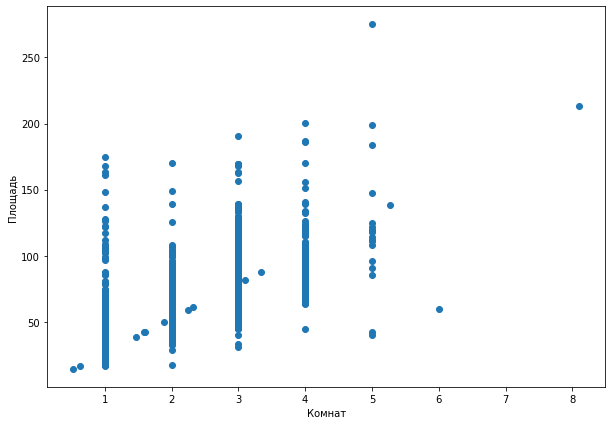

In [396]:
plt.figure(figsize=(10,7))
plt.scatter(df['Rooms'], df['Square'])
plt.xlabel('Комнат')
plt.ylabel('Площадь')
plt.draw()

Попробуем оставить так..

С этажами и этажностью тоже много путаницы. А между тем это важные показатели тоже..

In [276]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9.997000e+03,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,8384.529359,50.401821,1.889407,56.260139,35.947554,5.716057,8.525158,12.609083,3.990762e+03,0.118853,24.687106,5352.169551,8.026808,1026.488747,1.319096,4.229269,214161.934244
std,4858.542606,43.588632,0.815578,19.134302,14.769617,3.997479,5.239797,6.775928,2.005303e+05,0.119030,17.535219,4007.359551,23.798206,746.701412,1.493620,4.803361,92874.114626
min,0.000000,0.000000,0.524741,13.784865,8.604072,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4171.000000,20.000000,1.000000,41.784835,24.754051,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153893.979077
50%,8395.000000,36.000000,2.000000,52.539711,33.073528,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192302.751941
75%,12594.000000,75.000000,2.000000,65.926624,44.040685,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249174.529858
max,16798.000000,209.000000,8.105578,275.645284,233.949309,43.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [397]:
df.loc[df['Floor'] > df['HouseFloor']].shape

(1818, 20)

In [398]:
df['HouseFloor'].median()

13.0

In [399]:
df['HouseFloor'].mean()

12.615138165798959

Выглядит довольно консистентно - немного со смещением в сторону 0. Трудно предположить зависимость этажности дома от чего-то остального, имеющегося в нашем распоряжении - поэтому видимо нулевые выставляем в медианное значение.

In [405]:
df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df['HouseFloor'].median()

Теперь с этажом квартиры. Впринципе (насколько я знаю) - на цену влияют сильнее всего первый и последний этажи. Попробуем хотя-бя проследить нечто подобное.

Как мы видим из describe нулевых этажей нет (это кстати наводит на мысли о том, что данные в этом признаке аккуратны - им как-то больше доверия сразу.

In [406]:
middle_floor_df = df.loc[(df['Floor'] != df['HouseFloor'])  & (df['Floor'] != 1)]

In [407]:
margin_floor_df = df.loc[(df['Floor'] == df['HouseFloor']) | (df['Floor'] == 1)]

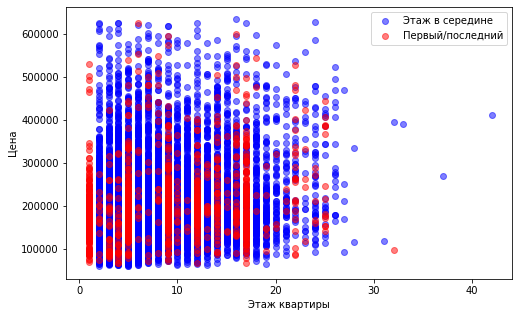

In [408]:
plt.figure(figsize=(8,5))
plt.scatter(middle_floor_df['Floor'], middle_floor_df['Price'], color='blue', alpha=0.5, label='Этаж в середине')
plt.scatter(margin_floor_df['Floor'], margin_floor_df['Price'], color='red', alpha=0.5, label='Первый/последний')
plt.xlabel('Этаж квартиры')
plt.ylabel('Цена')
plt.legend(loc='upper right')
plt.draw()

Ну - может быть мне кажется - но ощущение, что цена у первых и последних этажей в целом ниже... Соответственно - есть смысл наверное побороться за чистоту этого признака. Проблема в том, что общая этажность дома имеет неточности о чем свидетельствовали нули в этом признаке и значения этажа квартиры выше дома..

In [409]:
df.loc[df['Floor'] > df['HouseFloor']].shape

(1604, 20)

Соотношение квартир на первых-последних этажах ко всем остальным (включая конечно же и ошибочные)

In [412]:
len(middle_floor_df)/len(margin_floor_df)

7.792253521126761

Вот наверное согласно этому соотношению попробуем заполнить ошибочные этажности. Для начала сделаем новый бинарный признак ("средний этаж" - 1, "первый/последний - 0")

In [413]:
df['middleFloor'] = np.where((df['Floor'] == 1) | (df['Floor'] == df['HouseFloor']), 0, 1)

И пометим все записи с явно ошибочной этажностью nan-ами в этом признаке

In [414]:
df.loc[df['Floor'] > df['HouseFloor'], 'middleFloor'] = np.nan

Теперь посмотрим соотношение "средних" к "краевым"

In [415]:
df.middleFloor.value_counts()

1.0    7248
0.0    1136
Name: middleFloor, dtype: int64

In [423]:
floorRatio = df.middleFloor.value_counts(normalize=True)
floorRatio

1.0    0.864504
0.0    0.135496
Name: middleFloor, dtype: float64

Кстати, как сейчас выглядит распределение этаж/этажность дома

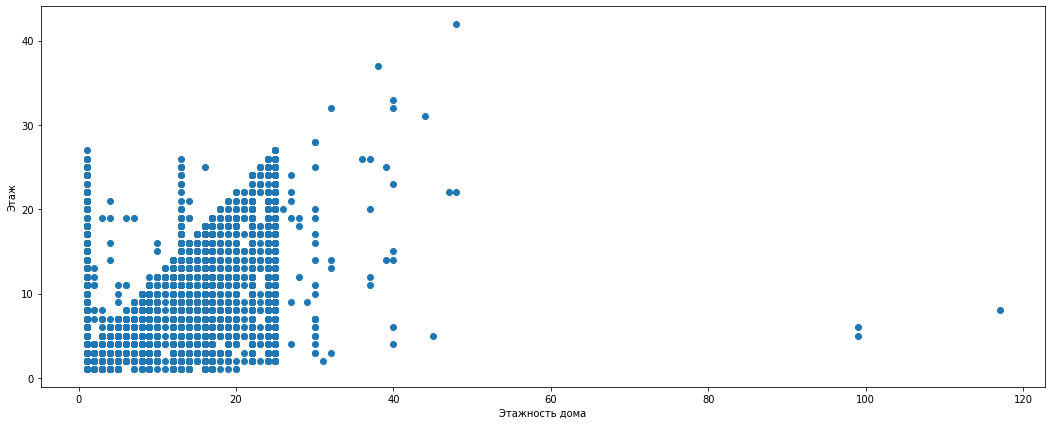

In [422]:
plt.figure(figsize=(18,7))
plt.scatter(df['HouseFloor'], df['Floor'])
plt.ylabel('Этаж')
plt.xlabel('Этажность дома')
plt.draw()

Вот всё, что "торчит" слева над четким треугольником - и есть ошибки

Попробуем лечить статистическим распределением (все ошибочные распределим в соотношении 0.864504 - средние этажи (выставим значение этажности куда-то выше этажа квартиры, скажем этажа на 3) к 0.135496 - крайние этажи - здесь значение этажности дома будем делать равным этажу квартиры. Сначала исправим бинарный признак

In [426]:
wrong = df['middleFloor'].isnull()
df.loc[wrong, 'middleFloor'] = np.random.choice(floorRatio.index, size=len(df[wrong]), p=floorRatio.values)

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9988 entries, 0 to 9999
Data columns (total 21 columns):
Id               9988 non-null int64
DistrictId       9988 non-null int64
Rooms            9988 non-null float64
Square           9988 non-null float64
LifeSquare       9988 non-null float64
KitchenSquare    9988 non-null float64
Floor            9988 non-null int64
HouseFloor       9988 non-null float64
HouseYear        9988 non-null int64
Ecology_1        9988 non-null float64
Ecology_2        9988 non-null object
Ecology_3        9988 non-null object
Social_1         9988 non-null int64
Social_2         9988 non-null int64
Social_3         9988 non-null int64
Healthcare_1     9988 non-null float64
Helthcare_2      9988 non-null int64
Shops_1          9988 non-null int64
Shops_2          9988 non-null object
Price            9988 non-null float64
middleFloor      9988 non-null float64
dtypes: float64(9), int64(9), object(3)
memory usage: 2.0+ MB


middleFloor заполнился. Теперь по нему "вылечим" этажность дома там где она неверна.

In [429]:
df.loc[(df['HouseFloor'] < df['Floor']) & (df['middleFloor'] == 1), 'HouseFloor'] = df['Floor'] + 3
df.loc[(df['HouseFloor'] < df['Floor']) & (df['middleFloor'] == 0), 'HouseFloor'] = df['Floor']

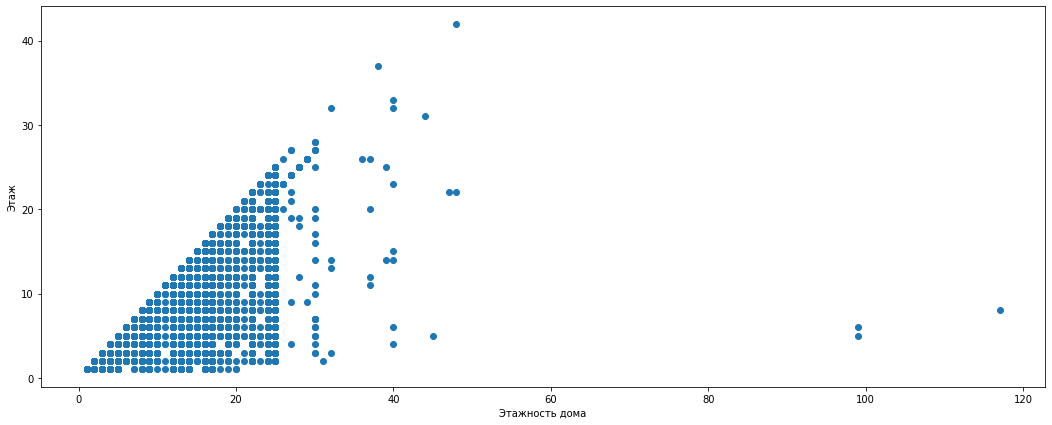

In [430]:
plt.figure(figsize=(18,7))
plt.scatter(df['HouseFloor'], df['Floor'])
plt.ylabel('Этаж')
plt.xlabel('Этажность дома')
plt.draw()

Теперь красиво. Надеюсь что это еще и будет полезно )). Бинарный признак думаю тоже оставим.

In [431]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,middleFloor
count,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.00000,9.988000e+03,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,8383.683220,50.426211,1.889976,56.243459,35.937893,5.720407,8.524229,13.98348,3.992569e+03,0.118863,24.696536,5353.968062,8.032439,1026.502303,1.319483,4.230376,214108.240296,0.864638
std,4859.141539,43.598423,0.815509,19.095167,14.752744,3.996641,5.234227,5.91074,2.006207e+05,0.119054,17.534235,4006.975770,23.808096,746.823145,1.493604,4.804133,92789.208200,0.342127
min,0.000000,0.000000,0.524739,13.784865,8.604072,0.000000,1.000000,1.00000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000
25%,4169.500000,20.000000,1.000000,41.787090,24.763243,1.000000,4.000000,9.00000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153907.528147,1.000000
50%,8394.500000,36.000000,2.000000,52.539909,33.075870,6.000000,7.000000,14.00000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192304.063740,1.000000
75%,12594.250000,75.000000,2.000000,65.912854,44.035075,9.000000,12.000000,17.00000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,249116.513046,1.000000
max,16798.000000,209.000000,8.105547,275.645284,233.949309,43.000000,42.000000,117.00000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,1.000000


Займемся годом постройки..

In [432]:
df['HouseYear'].describe()

count    9.988000e+03
mean     3.992569e+03
std      2.006207e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [447]:
df['HouseYear'].median()

1977.0

In [450]:
df.loc[df['HouseYear'] > 2020].shape

(2, 21)

In [451]:
df.loc[df['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,middleFloor
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,...,B,30,6141,10,262.0,3,6,B,254084.534396,1.0
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,...,B,25,4756,16,2857.0,5,8,B,243028.603096,1.0


Эти года - точно ошибочны. Понятно, что первый - это просто два года (брать среднее?), а второй - скорее всего 1968

In [452]:
df.loc[df['HouseYear'] > 5000, 'HouseYear'] = 2008

In [ ]:
df.loc[df['HouseYear'] > 4000, 'HouseYear'] = 1968

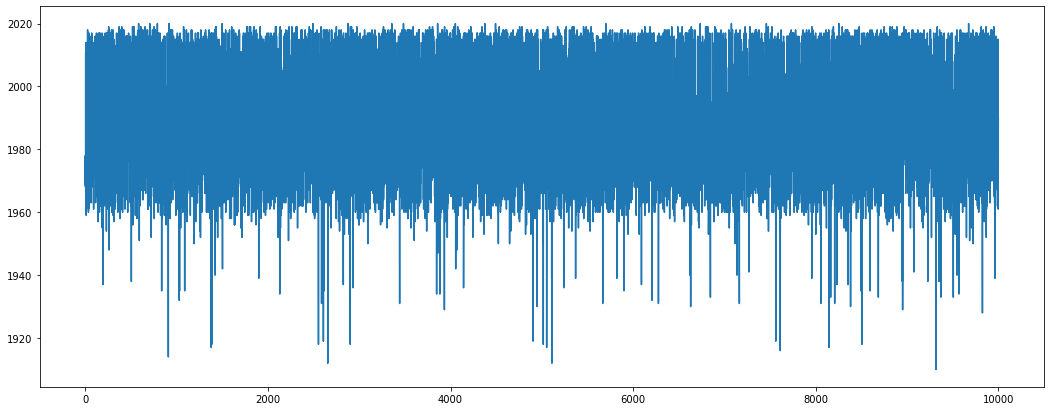

In [453]:
plt.figure(figsize=(18,7))
plt.plot(df['HouseYear'])
plt.draw()

In [454]:
df['HouseYear'].describe()

count    9988.000000
mean     1984.857529
std        18.408943
min      1910.000000
25%      1974.000000
50%      1977.000000
75%      2001.000000
max      2020.000000
Name: HouseYear, dtype: float64

Ок - это выглядит приемлемым. Теперь с категориальными признаками - все они по-сути бинарны (A/B)

In [456]:
df['Ecology_2'].value_counts()

B    9891
A      97
Name: Ecology_2, dtype: int64

In [457]:
df['Ecology_3'].value_counts()

B    9713
A     275
Name: Ecology_3, dtype: int64

In [458]:
df['Shops_2'].value_counts()

B    9163
A     825
Name: Shops_2, dtype: int64

Так, что заменим их на на 0/1

In [523]:
df.loc[df['Shops_2'] == 'A', 'Shops_2'] = 0
df.loc[df['Shops_2'] == 'B', 'Shops_2'] = 1

In [524]:
df.loc[df['Ecology_2'] == 'B', 'Ecology_2'] = 1
df.loc[df['Ecology_2'] == 'A', 'Ecology_2'] = 0

In [525]:
df.loc[df['Ecology_3'] == 'B', 'Ecology_3'] = 1
df.loc[df['Ecology_3'] == 'A', 'Ecology_3'] = 0

Итоговая последовательность предобработки:

In [813]:
def prepare(name):
    df = pd.read_csv(name)
    df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()
    df.drop(df[df['Square']>400].index, inplace=True)
    square_ratio = df['Square'].median()/df['LifeSquare'].median()
    df.loc[(df['Square'] < 10) & (df['LifeSquare'] > 10), 'Square'] = df['LifeSquare'] * square_ratio
    df.drop(df[df['Square']<6].index, inplace=True)
    df.loc[(df['LifeSquare'] < 5), 'LifeSquare'] = df['Square'] / square_ratio
    df.loc[df['LifeSquare'] > df['Square'], 'LifeSquare'] = df['Square'] / square_ratio
    df.loc[(df['Square'] / df['LifeSquare'] > square_ratio * 2) & (df['LifeSquare'] < 20), 'LifeSquare'] = df['Square'] / square_ratio
    df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['Square'] / square_ratio
    df.loc[df['KitchenSquare'] > 200, 'KitchenSquare'] = df['Square'] / (df['Square'].median()/df['KitchenSquare'].median())
    df.loc[df['KitchenSquare'] > df['Square'], 'KitchenSquare'] = df['Square'] / (df['Square'].median()/df['KitchenSquare'].median())
    kitchen_ratio = df['Square'].median() / df['KitchenSquare'].median()
    df.loc[abs((df['KitchenSquare']/df['Square']) > 0.7), 'KitchenSquare'] = df['Square'] / kitchen_ratio
    df.loc[df['KitchenSquare'] == 0, 'KitchenSquare'] = round(df['Square']/kitchen_ratio)
    rooms_ratio = df['Square'].median()/df['Rooms'].median()
    df.loc[df['Rooms'] == 0, 'Rooms'] = df['Square'] / rooms_ratio
    df.loc[df['Square']/df['Rooms'] < 7, 'Rooms'] = df['Square'] / rooms_ratio
    df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df['HouseFloor'].median()
    df['middleFloor'] = np.where((df['Floor'] == 1) | (df['Floor'] == df['HouseFloor']), 0, 1)
    df.loc[df['Floor'] > df['HouseFloor'], 'middleFloor'] = np.nan
    floorRatio = df.middleFloor.value_counts(normalize=True)
    wrong = df['middleFloor'].isnull()
    df.loc[wrong, 'middleFloor'] = np.random.choice(floorRatio.index, size=len(df[wrong]), p=floorRatio.values)
    df.loc[(df['HouseFloor'] < df['Floor']) & (df['middleFloor'] == 1), 'HouseFloor'] = df['Floor'] + 3
    df.loc[(df['HouseFloor'] < df['Floor']) & (df['middleFloor'] == 0), 'HouseFloor'] = df['Floor']
    df.loc[df['HouseYear'] > 5000, 'HouseYear'] = 2008
    df.loc[df['HouseYear'] > 4000, 'HouseYear'] = 1968
    df.loc[df['Shops_2'] == 'A', 'Shops_2'] = 0
    df.loc[df['Shops_2'] == 'B', 'Shops_2'] = 1
    df.loc[df['Ecology_2'] == 'B', 'Ecology_2'] = 1
    df.loc[df['Ecology_2'] == 'A', 'Ecology_2'] = 0
    df.loc[df['Ecology_3'] == 'B', 'Ecology_3'] = 1
    df.loc[df['Ecology_3'] == 'A', 'Ecology_3'] = 0
    return df

In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9988 entries, 0 to 9999
Data columns (total 21 columns):
Id               9988 non-null int64
DistrictId       9988 non-null int64
Rooms            9988 non-null float64
Square           9988 non-null float64
LifeSquare       9988 non-null float64
KitchenSquare    9988 non-null float64
Floor            9988 non-null int64
HouseFloor       9988 non-null float64
HouseYear        9988 non-null float64
Ecology_1        9988 non-null float64
Ecology_2        9988 non-null int64
Ecology_3        9988 non-null int64
Social_1         9988 non-null int64
Social_2         9988 non-null int64
Social_3         9988 non-null int64
Healthcare_1     9988 non-null float64
Helthcare_2      9988 non-null int64
Shops_1          9988 non-null int64
Shops_2          9988 non-null int64
Price            9988 non-null float64
middleFloor      9988 non-null float64
dtypes: float64(10), int64(11)
memory usage: 2.0 MB


Конвертировали обжекты в числовые типы. Колонка Id нам не нужна, поскольку ничего осмысленного в прогнозном плане не обозначает. Но насколько я понимаю мы должны ее сохранить в каком-то виде, чтобы обеспечить референс к результатам. Попробуем сделать из нее индекс.

In [558]:
test_df = df.set_index('Id')
test_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,middleFloor
Id,,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969.0,0.089040,1,1,33,7976,5,900.0,0,11,1,184966.930730,1.0
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978.0,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063,1.0
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968.0,0.049637,1,1,34,7759,0,229.0,1,3,1,220925.908524,1.0
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977.0,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217,1.0
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976.0,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644,1.0


In [473]:
test_df.to_csv('prepared.csv')

In [559]:
feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor',
                'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2', 'middleFloor']

In [560]:
X = test_df.drop(['Price'], axis=1)

In [561]:
y = test_df.drop(feature_names, axis=1)

In [529]:
y.head()

,Price
Id,
14038,184966.930730
15053,300009.450063
4765,220925.908524
5809,175616.227217
10783,150226.531644


In [488]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [562]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [563]:
X_train.shape

(6991, 19)

In [564]:
X_test.shape

(2997, 19)

In [565]:
lr = LinearRegression()

In [566]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [567]:
y_pred = lr.predict(X_test)

In [494]:
from sklearn.metrics import r2_score

In [568]:
r2_score(y_test, y_pred)

0.5425916286059707

<BarContainer object of 19 artists>

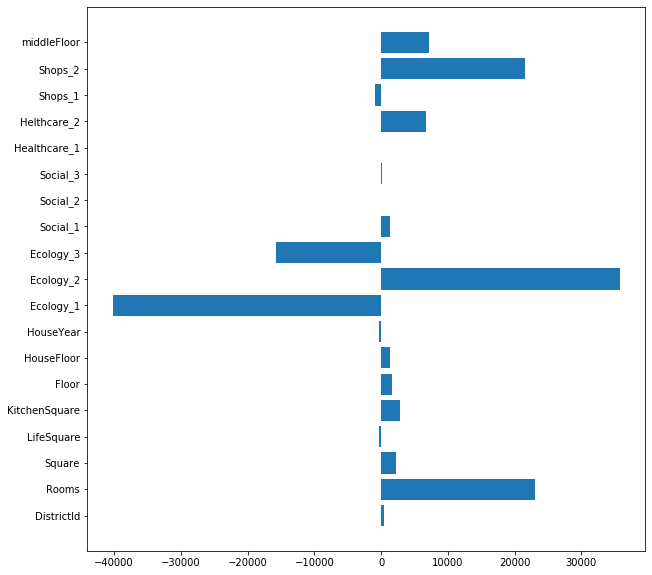

In [569]:
plt.figure(figsize=(10,10))
plt.barh(X_train.columns, lr.coef_.flatten())

In [570]:
test_df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,middleFloor
count,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.00000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,50.426211,1.889976,56.243459,35.937893,5.720407,8.524229,13.98348,1984.857529,0.118863,0.990288,0.972467,24.696536,5353.968062,8.032439,1026.502303,1.319483,4.230376,0.917401,214108.240296,0.864638
std,43.598423,0.815509,19.095167,14.752744,3.996641,5.234227,5.91074,18.408943,0.119054,0.098073,0.163639,17.534235,4006.975770,23.808096,746.823145,1.493604,4.804133,0.275289,92789.208200,0.342127
min,0.000000,0.524739,13.784865,8.604072,0.000000,1.000000,1.00000,1910.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000
25%,20.000000,1.000000,41.787090,24.763243,1.000000,4.000000,9.00000,1974.000000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,1.000000,153907.528147,1.000000
50%,36.000000,2.000000,52.539909,33.075870,6.000000,7.000000,14.00000,1977.000000,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192304.063740,1.000000
75%,75.000000,2.000000,65.912854,44.035075,9.000000,12.000000,17.00000,2001.000000,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,1.000000,249116.513046,1.000000
max,209.000000,8.105547,275.645284,233.949309,43.000000,42.000000,117.00000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570,1.000000


Может попробовать стандартизировать значения.....

In [499]:
from sklearn.preprocessing import StandardScaler

In [571]:
scaler = StandardScaler()

In [572]:
X_train_scaled = scaler.fit_transform(X_train)

In [573]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [574]:
X_test_scaled = scaler.transform(X_test)

In [575]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [576]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [577]:
y_pred = lr.predict(X_test_scaled)

In [578]:
r2_score(y_test, y_pred)

0.5425916286059747

<BarContainer object of 19 artists>

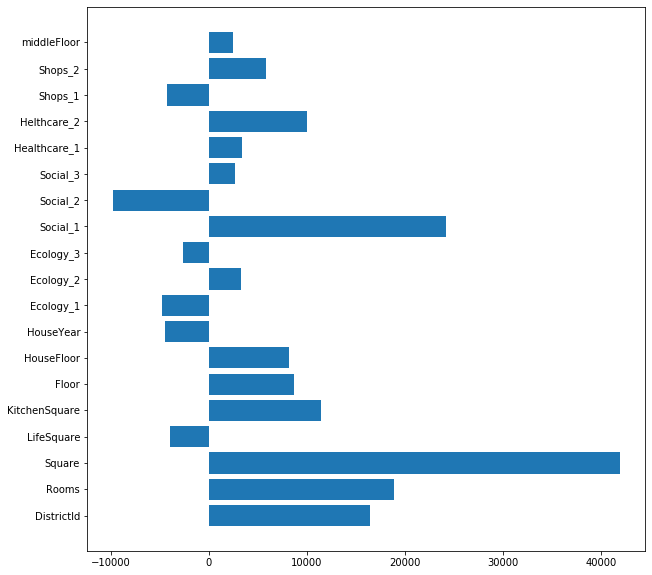

In [579]:
plt.figure(figsize=(10,10))
plt.barh(X_train_scaled.columns, lr.coef_.flatten())

Вобщем очень плохо )) Надо пробовать что-то с этим делать.

Опытным путем немного поудаляем признаки )

In [621]:
X_train_d = X_train.drop(['LifeSquare', 'Helthcare_2'], axis=1)
X_test_d = X_test.drop(['LifeSquare', 'Helthcare_2'], axis=1)
lr.fit(X_train_d, y_train)
y_pred = lr.predict(X_test_d)
r2_score(y_test, y_pred)

0.5437455312492541

<BarContainer object of 17 artists>

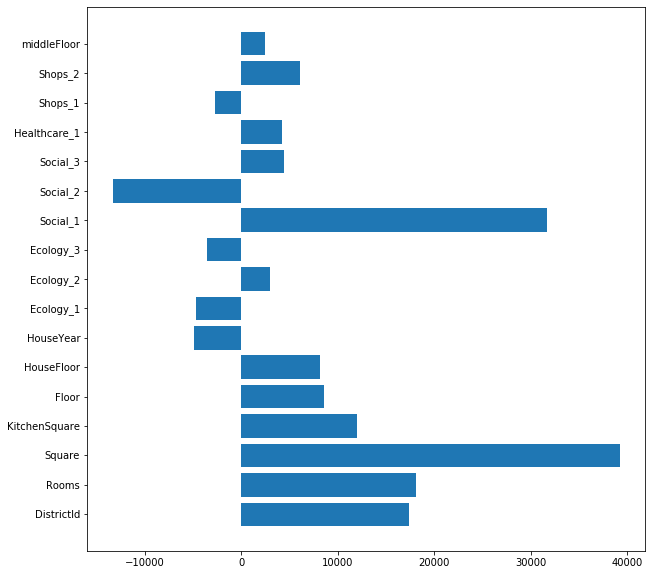

In [633]:
plt.figure(figsize=(10,10))
plt.barh(X_train_d.columns, lr.coef_.flatten())

Ну и попробуем стандартизировать...

In [622]:
X_train_scaled_d = scaler.fit_transform(X_train_d)
X_train_scaled_d = pd.DataFrame(X_train_scaled_d, columns=X_train_d.columns)
X_test_scaled_d = scaler.transform(X_test_d)
X_test_scaled_d = pd.DataFrame(X_test_scaled_d, columns=X_test_d.columns)
lr.fit(X_train_scaled_d, y_train)
y_pred = lr.predict(X_test_scaled_d)
r2_score(y_test, y_pred)

0.543745531249251

Никакого профита не получается..

In [623]:
from sklearn.ensemble import RandomForestRegressor

In [624]:
model = RandomForestRegressor(max_depth=24, n_estimators=2000, random_state=100)

In [625]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [626]:
y_pred = model.predict(X_test)

In [627]:
r2_score(y_test, y_pred)

0.7140244322554048

Лес гораздо круче. А с обрезанным набором признаков..

In [628]:
model.fit(X_train_d, y_train.values[:, 0])
y_pred = model.predict(X_test_d)
r2_score(y_test, y_pred)

0.7134986504158444

Хуже.. А стандартизированный...

In [629]:
model.fit(X_train_scaled_d, y_train.values[:, 0])
y_pred = model.predict(X_test_scaled_d)
r2_score(y_test, y_pred)

0.7138890382609203

In [630]:
model.fit(X_train_scaled, y_train.values[:, 0])
y_pred = model.predict(X_test_scaled)
r2_score(y_test, y_pred)

0.7143892268018512

Полный набор немного получше..

In [631]:
model = RandomForestRegressor(max_depth=24, n_estimators=2000, random_state=100)
model.fit(X_train_scaled, y_train.values[:, 0])
y_pred = model.predict(X_test_scaled)
r2_score(y_test, y_pred)

0.7174472067024618

Попробуем еще один известный нам метод..

In [634]:
from sklearn.neighbors import KNeighborsRegressor

In [645]:
knr = KNeighborsRegressor(n_neighbors=7)
knr.fit(X_train_scaled, y_train)
y_pred = knr.predict(X_test_scaled)
r2_score(y_test, y_pred)

0.6372380453544596

Ну KNN слабее деревьев.. Надо пробовать улучшить данные еще. Попробуем нулевые кухни как-то восстановить..

In [646]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,middleFloor
count,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.00000,9988.000000,9988.000000,...,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,8383.683220,50.426211,1.889976,56.243459,35.937893,5.720407,8.524229,13.98348,1984.857529,0.118863,...,0.972467,24.696536,5353.968062,8.032439,1026.502303,1.319483,4.230376,0.917401,214108.240296,0.864638
std,4859.141539,43.598423,0.815509,19.095167,14.752744,3.996641,5.234227,5.91074,18.408943,0.119054,...,0.163639,17.534235,4006.975770,23.808096,746.823145,1.493604,4.804133,0.275289,92789.208200,0.342127
min,0.000000,0.000000,0.524739,13.784865,8.604072,0.000000,1.000000,1.00000,1910.000000,0.000000,...,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000
25%,4169.500000,20.000000,1.000000,41.787090,24.763243,1.000000,4.000000,9.00000,1974.000000,0.017647,...,1.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,1.000000,153907.528147,1.000000
50%,8394.500000,36.000000,2.000000,52.539909,33.075870,6.000000,7.000000,14.00000,1977.000000,0.075424,...,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192304.063740,1.000000
75%,12594.250000,75.000000,2.000000,65.912854,44.035075,9.000000,12.000000,17.00000,2001.000000,0.195781,...,1.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,1.000000,249116.513046,1.000000
max,16798.000000,209.000000,8.105547,275.645284,233.949309,43.000000,42.000000,117.00000,2020.000000,0.521867,...,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570,1.000000


In [647]:
df.loc[df['KitchenSquare'] == 0].shape

(696, 21)

In [654]:
kitchen_ratio = df['Square'].median() / df['KitchenSquare'].median()
kitchen_ratio

8.756651563192996

In [655]:
df.loc[df['KitchenSquare'] == 0, 'KitchenSquare'] = round(df['Square']/kitchen_ratio)

In [656]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,middleFloor
count,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.00000,9988.000000,9988.000000,...,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000,9988.000000
mean,8383.683220,50.426211,1.889976,56.243459,35.937893,6.199782,8.524229,13.98348,1984.857529,0.118863,...,0.972467,24.696536,5353.968062,8.032439,1026.502303,1.319483,4.230376,0.917401,214108.240296,0.864638
std,4859.141539,43.598423,0.815509,19.095167,14.752744,3.737210,5.234227,5.91074,18.408943,0.119054,...,0.163639,17.534235,4006.975770,23.808096,746.823145,1.493604,4.804133,0.275289,92789.208200,0.342127
min,0.000000,0.000000,0.524739,13.784865,8.604072,1.000000,1.000000,1.00000,1910.000000,0.000000,...,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000
25%,4169.500000,20.000000,1.000000,41.787090,24.763243,4.000000,4.000000,9.00000,1974.000000,0.017647,...,1.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,1.000000,153907.528147,1.000000
50%,8394.500000,36.000000,2.000000,52.539909,33.075870,6.000000,7.000000,14.00000,1977.000000,0.075424,...,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192304.063740,1.000000
75%,12594.250000,75.000000,2.000000,65.912854,44.035075,9.000000,12.000000,17.00000,2001.000000,0.195781,...,1.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,1.000000,249116.513046,1.000000
max,16798.000000,209.000000,8.105547,275.645284,233.949309,43.000000,42.000000,117.00000,2020.000000,0.521867,...,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570,1.000000


Посмотрим - помогло ли хоть как-то, завернем подготовку данных (стандартизацию) в функцию

In [778]:
def standardize(df):
    feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor',
                'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2', 'middleFloor', 'index']
    test_df = df.copy()
    test_df.reset_index(inplace=True)
    scaler = StandardScaler()
    features_to_stand = test_df[feature_names].select_dtypes(include='float64').columns.tolist()
    stand_features = scaler.fit_transform(test_df[features_to_stand])
    test_df[features_to_stand] = pd.DataFrame(stand_features, columns=features_to_stand)
    stand_df = test_df.set_index('Id')
    X = stand_df.drop(['Price'], axis=1)
    y = stand_df.drop(feature_names, axis=1)
    return X, y

In [800]:
X, y = standardize(df)

In [774]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=100)
model = RandomForestRegressor(max_depth=24, n_estimators=2000, random_state=100)
model.fit(X_train, y_train.values[:, 0])
y_pred = model.predict(X_test)
print('r2 = %f' % r2_score(y_test, y_pred))

r2 = 0.719574


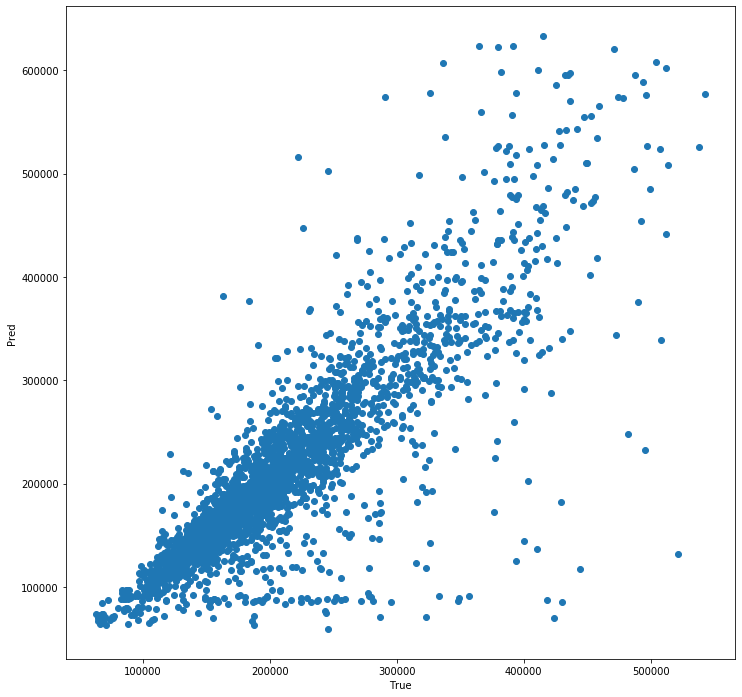

In [775]:
plt.figure(figsize=(12,12))
plt.scatter(y_pred, y_test)
plt.ylabel('Pred')
plt.xlabel('True')
plt.draw()

Подбор параметров может дать тоже что нибудь в плане точности..

In [801]:
from sklearn.model_selection import GridSearchCV, KFold

In [805]:
model = RandomForestRegressor()
parms = {'n_estimators': [2000, 3000, 4000], 'max_depth': [25, 27, 29]}
gs = GridSearchCV(model, parms, scoring='r2', cv=KFold(n_splits=3, random_state=100, shuffle=True), n_jobs=-1)
gs.fit(X, y['Price'])

GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-

In [806]:
gs.best_params_

{'max_depth': 27, 'n_estimators': 3000}

In [807]:
gs.best_score_

0.7297790461198861

Попробуем градиентный бустинг

In [782]:
from sklearn.ensemble import GradientBoostingRegressor

In [787]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train['Price'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [789]:
y_pred = gb_model.predict(X_test)

In [790]:
print('r2 = %f' % r2_score(y_test, y_pred))

r2 = 0.702612


Ну.. что то такое. Как говорилось, это вовсе ничего не значит - нужно попробовать подобрать параметры..

In [792]:
from sklearn.model_selection import GridSearchCV, KFold

In [808]:
parms = {'n_estimators': [400, 500, 700, 900], 'max_depth': [2, 3, 4, 5]}
gs = GridSearchCV(gb_model, parms, scoring='r2', cv=KFold(n_splits=3, random_state=100, shuffle=True), n_jobs=-1)
gs.fit(X, y['Price'])

GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                           

In [809]:
gs.best_params_

{'max_depth': 3, 'n_estimators': 700}

In [810]:
gs.best_score_

0.7352121316876774

Видимо пока это предел. Заменим дистриктид на строковой

In [814]:
df = prepare('train.csv')

In [815]:
df.DistrictId = df.DistrictId.astype(str)

In [817]:
X, y = standardize(df)

In [818]:
parms = {'n_estimators': [400, 500, 700, 900], 'max_depth': [2, 3, 4, 5]}
gs = GridSearchCV(gb_model, parms, scoring='r2', cv=KFold(n_splits=3, random_state=100, shuffle=True), n_jobs=-1)
gs.fit(X, y['Price'])

GridSearchCV(cv=KFold(n_splits=3, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                           

In [819]:
gs.best_params_

{'max_depth': 3, 'n_estimators': 700}

In [820]:
gs.best_score_

0.736860828205108

Теперь попробуем получить синтетический параметр района и комнат от цены


In [831]:
df.groupby(['DistrictId', 'Rooms']).Price.agg(['median']).head()

median
DistrictId Rooms                  
0          1.000000  142799.434052
           2.000000  176210.812334
           3.000000  300610.359425
1          1.000000  146574.015522
           1.599015   78364.616704

In [840]:
df.groupby(['DistrictId', 'Rooms']).Price.transform('median').head()

0    207786.135836
1    300009.450063
2    263206.223152
3    166809.665642
4    158539.052715
Name: Price, dtype: float64

Что еще за 1.599 комнат..

In [833]:
df.loc[df['Rooms']%1 != 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,middleFloor
377,5927,57,2.248081,59.056975,36.223072,10.0,22,22.0,2002,0.090799,...,1,74,19083,2,900.0,5,15,1,317265.323792,0.0
1397,12638,27,5.269430,138.427694,136.215499,16.0,4,7.0,2016,0.075424,...,1,11,3097,0,900.0,0,0,1,268394.744389,1.0
1454,8491,1,1.599015,42.006046,21.779288,7.0,17,17.0,2014,0.007122,...,1,1,264,0,900.0,0,1,1,78364.616704,0.0
1981,7917,27,8.105547,212.932361,211.231125,24.0,2,3.0,2008,0.211401,...,1,9,1892,0,900.0,0,1,1,302211.260887,1.0
2269,7317,27,1.590824,41.790881,26.084533,5.0,13,13.0,1977,0.211401,...,1,9,1892,0,900.0,0,1,1,98129.976788,0.0
3911,770,28,1.883654,49.483501,30.886021,6.0,16,19.0,2015,0.118537,...,1,30,6207,1,1183.0,1,0,1,217009.338463,1.0
4366,456,6,3.102078,81.491446,50.864358,9.0,4,13.0,1977,0.243205,...,1,5,1564,0,540.0,0,0,1,212864.799112,1.0
4739,12676,81,0.524739,13.784865,8.604072,7.0,4,5.0,1960,0.319809,...,1,25,4756,16,2857.0,5,8,1,78388.806186,1.0
5617,15877,57,0.629892,16.547242,10.328260,8.0,5,5.0,1962,0.133215,...,1,49,11395,3,1406.0,3,4,0,77835.185808,0.0
6149,3159,88,1.473056,38.697117,19.345131,9.0,9,16.0,1982,0.127376,...,1,43,8429,3,900.0,3,9,1,158998.110646,1.0


In [835]:
shifted_round = lambda x: round(x) if x%1 > 0.6 else math.floor(x)
df.loc[df['Rooms']%1 != 0, 'Rooms'] = df['Rooms'].apply(shifted_round)

In [841]:
df['medianPrice'] = df.groupby(['DistrictId', 'Rooms']).Price.transform('median')

In [847]:
X, y = standardize(df)

In [860]:
parms = {'n_estimators': [100, 200, 300], 'max_depth': [4, 5, 6]}
gs = GridSearchCV(gb_model, parms, scoring='r2', cv=KFold(n_splits=5, random_state=100, shuffle=True), n_jobs=-1)
gs.fit(X, y['Price'])

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                           

In [861]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [862]:
gs.best_score_

0.7670944021548078

In [864]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=100)
gb_model = GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=21)
gb_model.fit(X_train, y_train['Price'])
y_pred = gb_model.predict(X_test)

In [867]:
r2_score(y_test['Price'], y_pred)

0.7662080113377562

In [871]:
pd.DataFrame(zip(X_train.columns, gb_model.feature_importances_), columns=['feature', 'importance']).\
        sort_values(by='importance', ascending=False)

,feature,importance
20,medianPrice,0.654706
3,Square,0.128261
14,Social_3,0.028022
5,KitchenSquare,0.025835
8,HouseYear,0.021894
7,HouseFloor,0.018186
4,LifeSquare,0.017247
12,Social_1,0.016014
13,Social_2,0.016008
0,index,0.013934


Может индекс тоже сконвертировать в строки.. или вообще удалить.

In [872]:
df.index = df.index.astype(str)

In [873]:
X, y = standardize(df)

In [874]:
parms = {'n_estimators': [100, 200, 300], 'max_depth': [4, 5, 6]}
gs = GridSearchCV(gb_model, parms, scoring='r2', cv=KFold(n_splits=5, random_state=100, shuffle=True), n_jobs=-1)
gs.fit(X, y['Price'])

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=5,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=200,
                           

In [875]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [876]:
gs.best_score_

0.7661785037958807

Стало хуже вроде бы

In [888]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=100)
gb_model = GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=0)
gb_model.fit(X_train, y_train['Price'])
y_pred = gb_model.predict(X_test)
r2_score(y_test['Price'], y_pred)

0.7682427251921231

In [889]:
pd.DataFrame(zip(X_train.columns, gb_model.feature_importances_), columns=['feature', 'importance']).\
        sort_values(by='importance', ascending=False)

,feature,importance
20,medianPrice,0.654425
3,Square,0.128873
14,Social_3,0.028119
5,KitchenSquare,0.025813
8,HouseYear,0.022039
7,HouseFloor,0.017899
4,LifeSquare,0.017385
13,Social_2,0.017194
12,Social_1,0.016433
0,index,0.013108


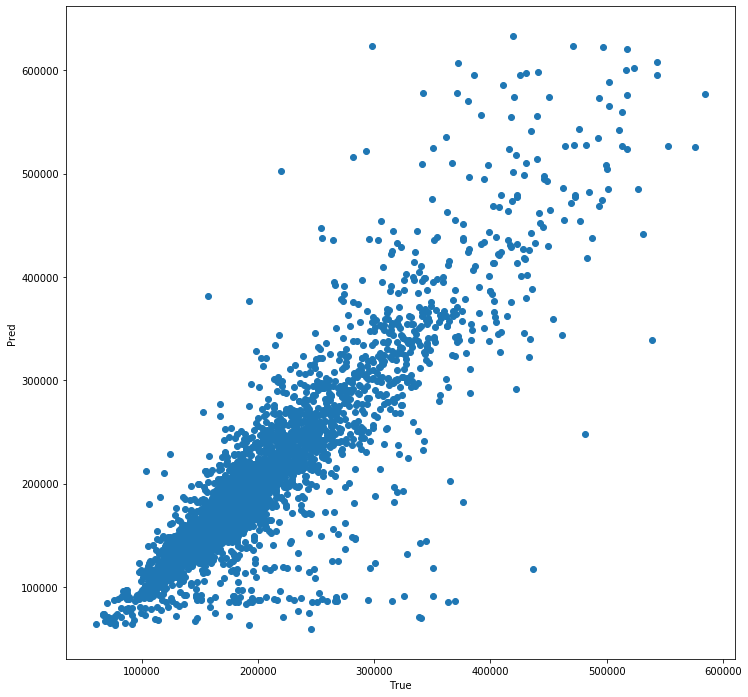

In [891]:
plt.figure(figsize=(12,12))
plt.scatter(y_pred, y_test['Price'])
plt.ylabel('Pred')
plt.xlabel('True')
plt.draw()

А на трейновой части

In [892]:
y_pred = gb_model.predict(X_train)
r2_score(y_train['Price'], y_pred)

0.9123828649566469

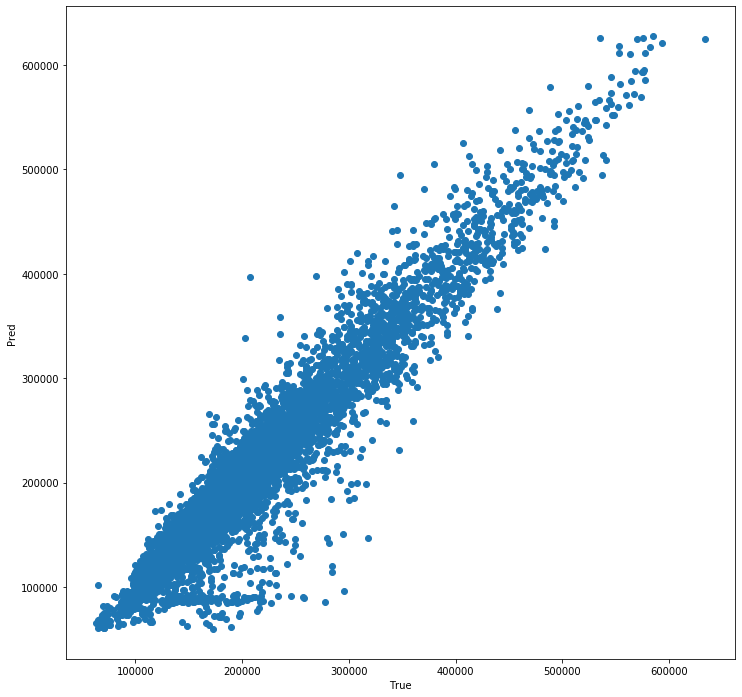

In [893]:
plt.figure(figsize=(12,12))
plt.scatter(y_pred, y_train['Price'])
plt.ylabel('Pred')
plt.xlabel('True')
plt.draw()

Есть вобщем куда стремиться )